Name: Aryan Jha

Course: MBA TECH AI

Topic: Appyling Learning Rate


![image.png](attachment:6e75a355-16e6-4416-9d9b-b5ad76dfe592.png)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Input layer
df=pd.read_csv('Iris.csv')


In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
species=pd.get_dummies(df['Species'])
species=species.astype(int)

In [ ]:
species.head(150)

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
df.drop('Species',axis=1,inplace=True)

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [ ]:
df.drop('Id',axis=1,inplace=True)

In [ ]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [ ]:
df_scaled=std_scaler.fit_transform(df)

In [ ]:
df_scaled.shape

(150, 4)

In [ ]:
df_transformed=pd.DataFrame(df_scaled,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

In [ ]:
Iris_df=pd.concat([df_transformed,species], axis=1)
#Axis=1 to concatenate columns

Input dimensions: 150 (no. of samples) x 4 (no. of features)

In [ ]:
Iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,-0.900681,1.032057,-1.341272,-1.312977,1,0,0
1,-1.143017,-0.124958,-1.341272,-1.312977,1,0,0
2,-1.385353,0.337848,-1.398138,-1.312977,1,0,0
3,-1.506521,0.106445,-1.284407,-1.312977,1,0,0
4,-1.021849,1.263460,-1.341272,-1.312977,1,0,0
...,...,...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,0,0,1
146,0.553333,-1.281972,0.705893,0.922064,0,0,1
147,0.795669,-0.124958,0.819624,1.053537,0,0,1
148,0.432165,0.800654,0.933356,1.447956,0,0,1


In [ ]:
input = Iris_df.iloc[:,0:4]

In [ ]:
input.shape

(150, 4)

In [ ]:
input

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [ ]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split

x=input.iloc[:,0:4]
y=Iris_df.iloc[:, 4:]

#using the tran test split function
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=104, test_size=0.2, shuffle=True)

In [ ]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [ ]:
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
x_train.shape

(120, 4)

In [ ]:
x_test.shape

(30, 4)

In [ ]:
y_train.shape

(120, 2)

In [ ]:
y_test.shape

(30, 0)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from keras.optimizers import SGD
opt=SGD(learning_rate =0.01)


In [ ]:
model=Sequential()
model.add(Dense(32, activation='leaky_relu', input_shape=(4,)))
model.add(Dense(32, activation='leaky_relu'))
model.add(Dense(16, activation='leaky_relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

1/1 [==============================] - 0s 25ms/step - loss: 0.1323 - accuracy: 0.9667


 Test Loss:  0.13231082260608673
Test Accuracy 0.9666666388511658 




(0.0, 1.5)

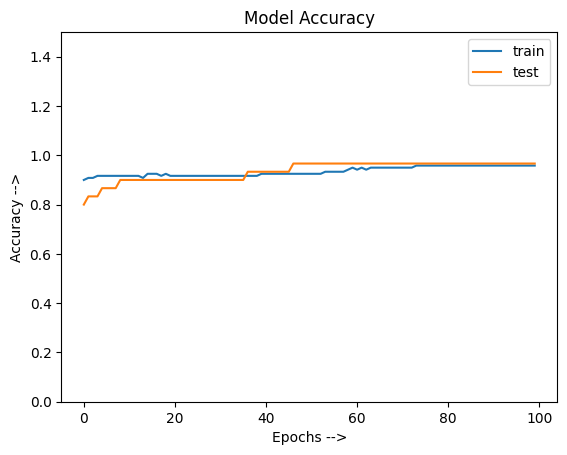

In [ ]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=0)
score=model.evaluate(x_test, y_test)

print("\n\n", "Test Loss: ", score[0])
print("Test Accuracy", score[1], "\n\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs -->')
plt.ylabel('Accuracy -->')
plt.legend(['train', 'test'])
plt.ylim(bottom=0)
plt.ylim(top=1.5)

In [ ]:
opt=SGD(learning_rate=0.01)
model.add(Dense(32, activation='leaky_relu', input_shape=(4,)))
model.add(Dense(32, activation='leaky_relu'))
model.add(Dense(16, activation='leaky_relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=0)
score=model.evaluate(x_test, y_test)